# Coding etiquete and excel reporting, Part 1, steps 6-8

## Content list:

#### 01. Importing libraries
#### 02. Importing data
#### 03. Creating visualizations with profile variables (Question 6)
#### 04. Aggregate customer profiles (Question 7)
#### 05. Comparing customer profiles (Question 8)

### 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing data

In [2]:
path= r'C:\Users\isobr\OneDrive\02122022Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\isobr\\OneDrive\\02122022Instacart Basket Analysis'

In [4]:
cust_prof = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'normal_cust_prods.pkl'))

In [5]:
cust_prof.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id',
       'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busier_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_frequency', 'frequency_flag', 'surname',
       'Gender', 'State', 'Age', 'date_joined', 'number_dependants',
       'family_status', 'income', 'region', 'activity_flag', 'age_flag',
       'income_flag', 'family_flag', 'product_type', 'popular_products',
       'popular_family_flag'],
      dtype='object')

### 0.3 Creating visualizations with profile variables (Question 6)

#### 0.3.1 Age profile

Text(0.5, 1.0, 'Orders by Age Group')

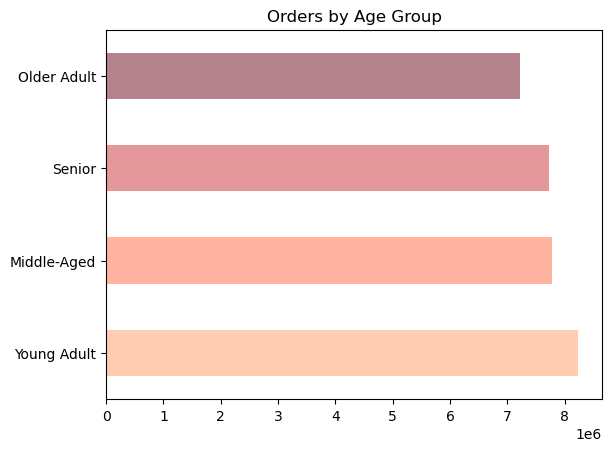

In [6]:
#Creating bar chart for the age profile
Bar_age=cust_prof['age_flag'].value_counts().plot.barh(color=['#ffcdb2','#ffb4a2','#e5989b','#b5838d'])
plt.ylabel('')
plt.title('Orders by Age Group',fontsize=12)

In [7]:
Bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dist_by_age_flag.png'))

#### 03.2 Income profile

Text(0.5, 1.0, 'Orders by Income Group')

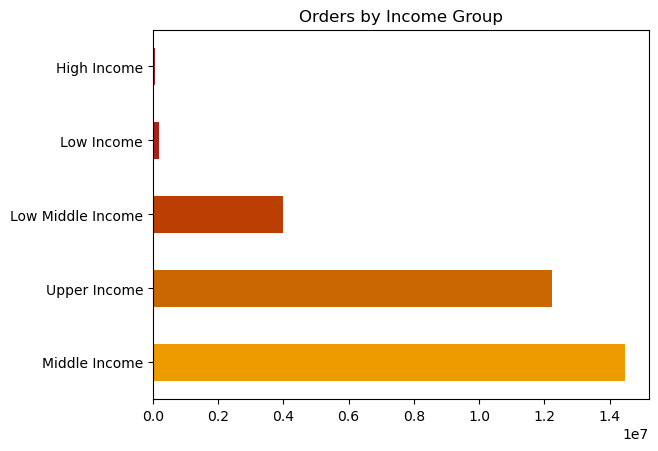

In [8]:
#Creating a bar for income groups
Bar_income=cust_prof['income_flag'].value_counts().plot.barh(color=['#ee9b00','#ca6702','#bb3e03','#ae2012','#9b2226'])
plt.ylabel('')
plt.title('Orders by Income Group',fontsize=12)

In [9]:
Bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dist_by_income_flag.png'))

#### 03.3 Family profile

Text(0.5, 1.0, 'Orders by Household Type')

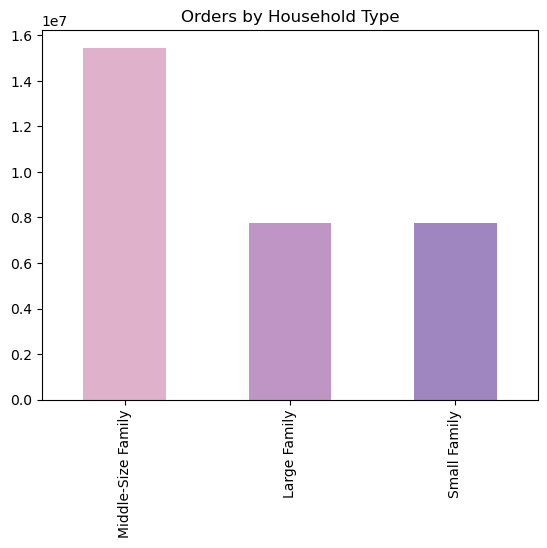

In [10]:
#Creating a bar for family group
Bar_family=cust_prof['family_flag'].value_counts().plot.bar(color=['#e0b1cb','#be95c4','#9f86c0'])
plt.ylabel('')
plt.title('Orders by Household Type',fontsize=12)

In [11]:
Bar_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dist_by_family_flag.png'))

#### 03.4 Product type profile

Text(0.5, 1.0, 'Orders by Product Type')

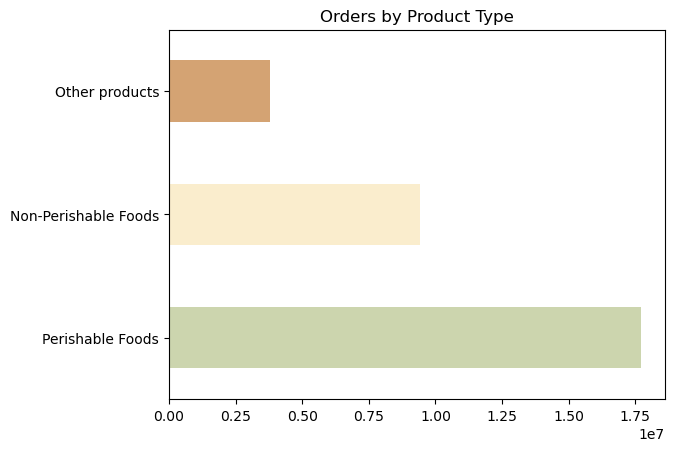

In [12]:
#Creating a bar for orders by product type
Bar_product_pref=cust_prof['product_type'].value_counts().plot.barh(color=['#ccd5ae','#faedcd','#d4a373'])
plt.ylabel('')
plt.title('Orders by Product Type',fontsize=12)

In [13]:
Bar_product_pref.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dist_by_product.png'))

Text(0.5, 1.0, 'Popularity of departments for families and singles')

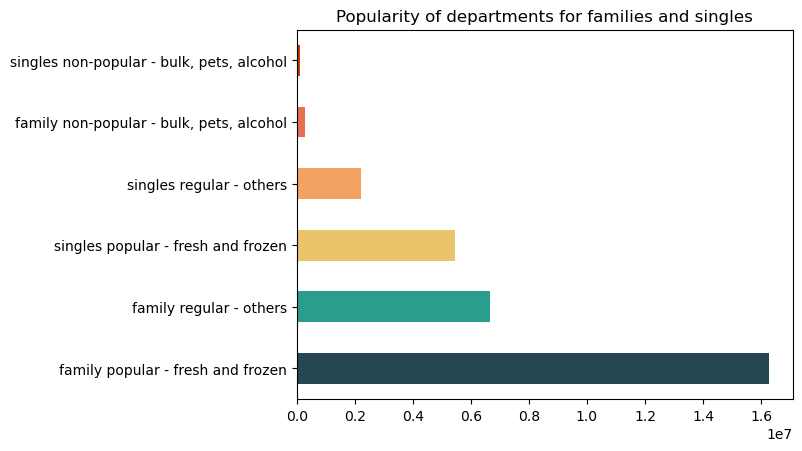

In [14]:
#creating a bar chart for the popular_family_flag
Bar_family_popular=cust_prof['popular_family_flag'].value_counts().plot.barh(color=['#264653','#2a9d8f','#e9c46a','#f4a261','#e76f51','#bb3e03'])
plt.ylabel('')
plt.title('Popularity of departments for families and singles',fontsize=12)

In [15]:
Bar_family_popular.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_popular_family_departments.png'))

Text(0.5, 1.0, 'Popular departments')

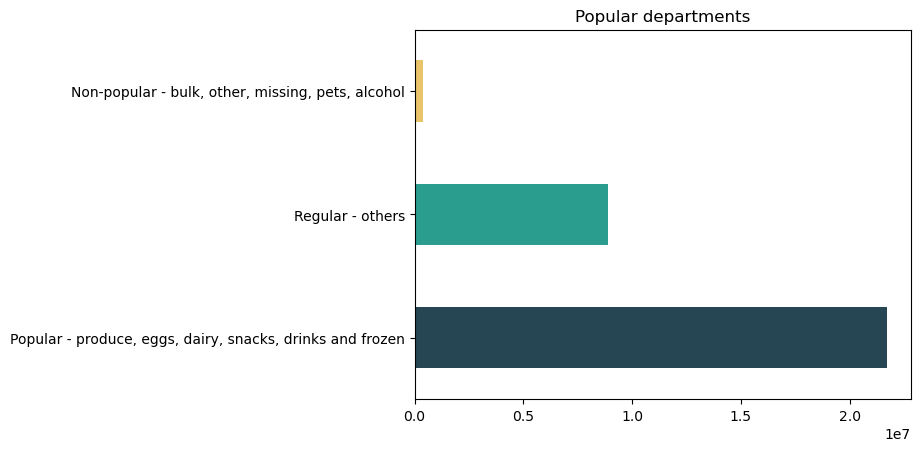

In [16]:
# Creating a bar chart for department popularity 
Bar_popular=cust_prof['popular_products'].value_counts().plot.barh(color=['#264653','#2a9d8f','#e9c46a'])
plt.ylabel('')
plt.title('Popular departments',fontsize=12)

In [17]:
Bar_popular.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_popular_departments.png'))

### 04. Aggregate customer profiles (Question 7)

Aggregate max, min and mean by customer profile in relation to frequency (i.e., frequency flag) and expenditure (i.e.spending flag)

#### 04.1 Age group

In [18]:
cust_prof.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id',
       'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busier_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_frequency', 'frequency_flag', 'surname',
       'Gender', 'State', 'Age', 'date_joined', 'number_dependants',
       'family_status', 'income', 'region', 'activity_flag', 'age_flag',
       'income_flag', 'family_flag', 'product_type', 'popular_products',
       'popular_family_flag'],
      dtype='object')

In [70]:
# using 'grouby by' to compare age groups in relation to frequency - i.e., days_since_prior_order
age_frequency=cust_prof.groupby('age_flag').agg({'days_since_prior_order':['mean','median','min','max']})

In [71]:
age_frequency

days_since_prior_order                  
                              mean median  min   max
age_flag                                            
Middle-Aged              10.589956    7.0  0.0  30.0
Older Adult              10.623852    7.0  0.0  30.0
Senior                   10.591476    7.0  0.0  30.0
Young Adult              10.618651    7.0  0.0  30.0

In [72]:
age_frequency.to_clipboard()

In [75]:
family_st_prices=cust_prof.groupby('family_status').agg({'prices':['mean','median','min','max']})

In [76]:
family_st_prices

prices                  
                                      mean median  min   max
family_status                                               
divorced/widowed                  7.803875    7.4  1.0  25.0
living with parents and siblings  7.802845    7.4  1.0  25.0
married                           7.793057    7.4  1.0  25.0
single                            7.786074    7.4  1.0  25.0

In [80]:
family_st_prices.to_clipboard()

In [77]:
family_st_frequency=cust_prof.groupby('family_status').agg({'days_since_prior_order':['mean','median','min','max']})

In [78]:
family_st_frequency

days_since_prior_order                  
                                                   mean median  min   max
family_status                                                            
divorced/widowed                              10.550203    7.0  0.0  30.0
living with parents and siblings              10.552147    7.0  0.0  30.0
married                                       10.615636    7.0  0.0  30.0
single                                        10.608732    7.0  0.0  30.0

In [79]:
family_st_frequency.to_clipboard()

In [67]:
age_prices=cust_prof.groupby('age_flag').agg({'prices':['mean','median','min','max']})

In [68]:
age_prices

prices                  
                 mean median  min   max
age_flag                               
Middle-Aged  7.797801    7.4  1.0  25.0
Older Adult  7.790783    7.4  1.0  25.0
Senior       7.797044    7.4  1.0  25.0
Young Adult  7.787750    7.4  1.0  25.0

In [69]:
age_prices.to_clipboard()

There no striking differences between age groups in terms of frequency and expenditure

#### 04.2 Income

In [21]:
# repeating the same for income
cust_prof.groupby('income_flag').agg({'days_since_prior_order':['mean','median','min','max']})

days_since_prior_order                  
                                    mean median  min   max
income_flag                                               
High Income                    10.290023    7.0  0.0  30.0
Low Income                     11.313452    7.0  0.0  30.0
Low Middle Income              10.871516    7.0  0.0  30.0
Middle Income                  10.568123    7.0  0.0  30.0
Upper Income                   10.554113    7.0  0.0  30.0

Low income customers are also less frequent customers compared to the other income groups

In [22]:
cust_prof.groupby('income_flag').agg({'prices':['mean','median','min','max']})

prices                  
                       mean median  min   max
income_flag                                  
High Income        7.925438    7.3  1.0  25.0
Low Income         6.532603    5.8  1.0  25.0
Low Middle Income  6.884475    6.3  1.0  25.0
Middle Income      7.921046    7.6  1.0  25.0
Upper Income       7.958181    7.6  1.0  25.0

The mean expenditure is higher in higher income groups, as would be expected

#### 04.3 Households

In [61]:
#repeating the same analysis for the family_flag
family_frequency=cust_prof.groupby('family_flag').agg({'days_since_prior_order':['mean','median','min','max']})

In [62]:
family_frequency

days_since_prior_order                  
                                     mean median  min   max
family_flag                                                
Large Family                    10.612427    7.0  0.0  30.0
Middle-Size Family              10.611165    7.0  0.0  30.0
Small Family                    10.588728    7.0  0.0  30.0

In [63]:
family_frequency.to_clipboard()

In [58]:
family_prices=cust_prof.groupby('family_flag').agg({'prices':['mean','median','min','max']})

In [59]:
family_prices

prices                  
                        mean median  min   max
family_flag                                   
Large Family        7.795558    7.4  1.0  25.0
Middle-Size Family  7.792738    7.4  1.0  25.0
Small Family        7.792158    7.4  1.0  25.0

In [60]:
family_prices.to_clipboard()

#### 04.4 Product type

In [25]:
#repeating the same analysis for product type
cust_prof.groupby('product_type').agg({'days_since_prior_order':['mean', 'median','min','max']})

days_since_prior_order                  
                                       mean median  min   max
product_type                                                 
Non-Perishable Foods              10.769606    7.0  0.0  30.0
Other products                    10.699559    7.0  0.0  30.0
Perishable Foods                  10.498614    7.0  0.0  30.0

As would be expected, the mean for perishable foods is lower, since these foods need to be acquired with more frequency

In [26]:
cust_prof.groupby('product_type').agg({'prices':['mean','median','min','max']})

prices                  
                          mean median  min   max
product_type                                    
Non-Perishable Foods  6.659093    5.9  1.0  15.0
Other products        7.833448    7.7  1.0  20.0
Perishable Foods      8.388623    8.2  1.0  25.0

#### 04.5 Department popularity 

In [27]:
#repeating the same analysis for department popularity
cust_prof.groupby('popular_products').agg({'days_since_prior_order':['mean', 'median','min','max']})

days_since_prior_order  \
                                                                     mean   
popular_products                                                            
Non-popular - bulk, other, missing, pets, alcohol               10.243046   
Popular - produce, eggs, dairy, snacks, drinks ...              10.527116   
Regular - others                                                10.813661   

                                                                      
                                                   median  min   max  
popular_products                                                      
Non-popular - bulk, other, missing, pets, alcohol     7.0  0.0  30.0  
Popular - produce, eggs, dairy, snacks, drinks ...    7.0  0.0  30.0  
Regular - others                                      7.0  0.0  30.0

In [28]:
cust_prof.groupby('popular_products').agg({'prices':['mean', 'median','min','max']})

prices                  
                                                        mean median  min   max
popular_products                                                              
Non-popular - bulk, other, missing, pets, alcohol   8.081012    7.6  1.0  15.0
Popular - produce, eggs, dairy, snacks, drinks ...  7.537659    7.2  1.0  25.0
Regular - others                                    8.406642    8.0  1.0  25.0

#### 04.6 Department popularity and families

In [29]:
#repeating the same analysis for popular_family_flag
cust_prof.groupby('popular_family_flag').agg({'days_since_prior_order':['mean', 'median','min','max']})

days_since_prior_order              \
                                                            mean median  min   
popular_family_flag                                                            
family non-popular - bulk, pets, alcohol               10.241272    7.0  0.0   
family popular - fresh and frozen                      10.532924    7.0  0.0   
family regular - others                                10.819117    7.0  0.0   
singles non-popular - bulk, pets, alcohol              10.248329    7.0  0.0   
singles popular - fresh and frozen                     10.509717    7.0  0.0   
singles regular - others                               10.797216    7.0  0.0   

                                                 
                                            max  
popular_family_flag                              
family non-popular - bulk, pets, alcohol   30.0  
family popular - fresh and frozen          30.0  
family regular - others                    30.0  
singles non-popular - bulk, pets, alcohol  30.0  
singles popular - fresh and frozen         30.0  
singles regular - others                   30.0

In [30]:
cust_prof.groupby('popular_family_flag').agg({'prices':['mean', 'median','min','max']})

prices                  
                                               mean median  min   max
popular_family_flag                                                  
family non-popular - bulk, pets, alcohol   8.095915    7.6  1.0  15.0
family popular - fresh and frozen          7.535531    7.2  1.0  25.0
family regular - others                    8.411629    8.0  1.0  25.0
singles non-popular - bulk, pets, alcohol  8.036623    7.6  1.0  15.0
singles popular - fresh and frozen         7.544034    7.2  1.0  25.0
singles regular - others                   8.391611    8.0  1.0  25.0

### 05. Comparing customer profiles (question 8)

Comparing customer profiles with regions and departments

In [65]:
region_orders=cust_prof['region'].value_counts(dropna=False)

In [66]:
region_orders.to_clipboard()

In [31]:
#Comparing age by region
age_region=pd.crosstab(cust_prof['age_flag'], cust_prof['region'])

In [32]:
age_region

region,Midwest,Northeast,South,West
age_flag,,,,
Middle-Aged,1856767,1338864,2598569,1980570
Older Adult,1693267,1263256,2395078,1865064
Senior,1799606,1394490,2549034,1987704
Young Adult,1911873,1468075,2768458,2093889


In [33]:
#copying the crosstab to clipboard
age_region.to_clipboard()

In [34]:
# checking differences related to age, in relation to departments
age_department =pd.crosstab(cust_prof['age_flag'], cust_prof['department_id'])

In [35]:
age_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
age_flag,,,,,,,,,,,,,,,,,,,,,
Middle-Aged,529973,8458,280762,2285621,36271,64491,642967,23071,204477,8508,...,168323,446231,168079,253069,1304931,175995,108023,689667,252291,16278
Older Adult,497664,8161,262887,2111465,33448,59172,605503,21098,192443,7586,...,156627,416835,156957,236280,1194911,163063,94907,648039,234610,14832
Senior,532530,8350,278458,2269085,34691,63227,646414,23751,205473,8336,...,170773,445174,165491,251940,1291039,176427,100162,688474,250463,15905
Young Adult,561564,9442,298721,2413102,40217,69101,677017,25140,219743,9021,...,179058,474465,180323,270785,1386301,184372,107300,740226,266470,17753


In [36]:
#copying the crosstab to clipboard
age_department.to_clipboard()

In [37]:
#Comparing income by region
income_region=pd.crosstab(cust_prof['income_flag'], cust_prof['region'])

In [38]:
income_region

region,Midwest,Northeast,South,West
income_flag,,,,
High Income,19323,9543,14613,14575
Low Income,53250,33075,65037,42508
Low Middle Income,916133,713131,1353114,1012932
Middle Income,3356424,2535131,4837342,3741959
Upper Income,2916383,2173805,4041033,3115253


In [55]:
#copying the crosstab to clipboard
income_region.to_clipboard()

There are really big differences in terms of region and income. Southern and Western regions have a larger share of middle and higher income clients

In [40]:
#Comparing income and department
income_department=pd.crosstab(cust_prof['income_flag'], cust_prof['department_id'])

In [41]:
income_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
income_flag,,,,,,,,,,,,,,,,,,,,,
High Income,4111,101,2583,11798,1849,514,5539,473,1759,4,...,1386,3614,1320,2151,9797,2838,450,5270,1560,59
Low Income,12769,288,6001,46021,1247,1375,23377,448,3938,333,...,1565,8716,4801,4190,28367,4726,1509,34849,6501,395
Low Middle Income,257946,4423,129530,1016391,20057,26789,433418,10567,81861,5345,...,47756,202438,105580,100391,608431,100859,39047,613502,126429,7943
Middle Income,995303,15985,528585,4352800,62101,124297,1138889,43049,397052,15714,...,334985,842970,302759,486551,2451711,314673,202010,1161402,471690,30911
Upper Income,851602,13614,454129,3652263,59373,103016,970678,38523,337526,12055,...,289089,724967,256390,418791,2078876,276761,167376,951383,397654,25460


In [56]:
#copying the crosstab to clipboard
income_department.to_clipboard()

In [43]:
#also checking income and the product_flag, which groups types of foods
income_product=pd.crosstab(cust_prof['income_flag'], cust_prof['product_type'])

In [44]:
income_product

product_type,Non-Perishable Foods,Other products,Perishable Foods
income_flag,,,
High Income,20679,8931,28444
Low Income,80370,20244,93256
Low Middle Income,1507175,454018,2034117
Middle Income,4241298,1787028,8442530
Upper Income,3589353,1528720,7128401


Higher incomes buy significantly more of perishable foods compared to non-perishable, while the difference is much smaller in lower income groups

In [45]:
#copying the crosstab to clipboard
income_product.to_clipboard()

In [46]:
#crosstab for family_flag and region
family_region=pd.crosstab(cust_prof['family_flag'], cust_prof['region'])

In [47]:
family_region

region,Midwest,Northeast,South,West
family_flag,,,,
Large Family,1787286,1381233,2585864,2018133
Middle-Size Family,3651411,2728970,5143342,3928644
Small Family,1822816,1354482,2581933,1980450


In [57]:
#copying the crosstab to clipboard
family_region.to_clipboard()

In [49]:
#comparing families and departments
family_department=pd.crosstab(cust_prof['family_flag'], cust_prof['department_id'])

In [50]:
family_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
family_flag,,,,,,,,,,,,,,,,,,,,,
Large Family,532408,8377,279822,2287719,37333,63473,640927,23142,208412,8403,...,171423,446156,167322,255325,1296264,176284,102585,691799,252592,16435
Middle-Size Family,1059975,17320,559611,4516113,70467,128057,1285633,46316,409428,17048,...,337480,892645,337096,505729,2586542,352215,204479,1384169,497860,32398
Small Family,529348,8714,281395,2275441,36827,64461,645341,23602,204296,8000,...,165878,443904,166432,251020,1294376,171358,103328,690438,253382,15935


In [51]:
family_department.to_clipboard()

In [52]:
#checking also family type and product type
family_products=pd.crosstab(cust_prof['family_flag'], cust_prof['product_type'])

In [53]:
family_products

product_type,Non-Perishable Foods,Other products,Perishable Foods
family_flag,,,
Large Family,2366204,951170,4455142
Middle-Size Family,4715401,1902264,8834702
Small Family,2357270,945507,4436904


In [54]:
#saving to clipboard
family_products.to_clipboard()

In [56]:
#comparing departments'popularity by region
popular_departments_region=pd.crosstab(cust_prof['popular_products'], cust_prof['region'])

In [57]:
popular_departments_region

region,Midwest,Northeast,South,West
popular_products,,,,
"Non-popular - bulk, other, missing, pets, alcohol",86876,66130,123268,94043
"Popular - produce, eggs, dairy, snacks, drinks and frozen",5088952,3834139,7236597,5556805
Regular - others,2085685,1564416,2951274,2276379


In [58]:
popular_departments_region.to_clipboard()

In [59]:
#comparing 'popular_family_flag' by region
pop_dep_family_region=pd.crosstab(cust_prof['popular_family_flag'], cust_prof['region'])

In [60]:
pop_dep_family_region

region,Midwest,Northeast,South,West
popular_family_flag,,,,
"family non-popular - bulk, pets, alcohol",64477,47838,93911,71013
family popular - fresh and frozen,3810751,2886810,5418576,4165412
family regular - others,1563469,1175555,2216719,1710352
"singles non-popular - bulk, pets, alcohol",22399,18292,29357,23030
singles popular - fresh and frozen,1278201,947329,1818021,1391393
singles regular - others,522216,388861,734555,566027


In [61]:
pop_dep_family_region.to_clipboard()